# Install VietOCR Library

In [10]:
! pip install --quiet vietocr

# Inference

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [12]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [13]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [14]:
detector = Predictor(config)

Model weight /tmp/vgg_transformer.pth exsits. Ignore download!


In [41]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 200,
  'valid_every': 4000,
  'iters': 100000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': None},
 'dataset': {'name': 'data',
  'data_root': './img/',
  'train_annotation': 'annotation_train.txt',
  'valid_annotation': 'annotation_val_small.txt',
  'image_height': 32,
  'image_min_width': 32,
  'imag

In [ ]:
cnn.features[i] = torch.nn.AvgPool2d(kernel_size=ks[pool_idx], stride=ss[pool_idx], padding=0)

# Dowload data 

In [44]:
! gdown --id 1wORAwmiPgk8348qmPl4V1nE0eQj2gUMh
! unzip  /content/Test_img.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wORAwmiPgk8348qmPl4V1nE0eQj2gUMh
To: /content/Test_img.zip
100% 7.10M/7.10M [00:00<00:00, 60.7MB/s]
Archive:  /content/Test_img.zip
   creating: Test_img/
  inflating: Test_img/20230415_163650.jpg  
  inflating: Test_img/20230415_163701.jpg  
  inflating: Test_img/20230415_163714.jpg  
  inflating: Test_img/20230415_163725.jpg  
  inflating: Test_img/20230415_163743.jpg  
  inflating: Test_img/20230415_163750.jpg  
  inflating: Test_img/20230415_163803.jpg  
  inflating: Test_img/screenshot_1681556044.png  


('Constructions', 0.5427330024540424)

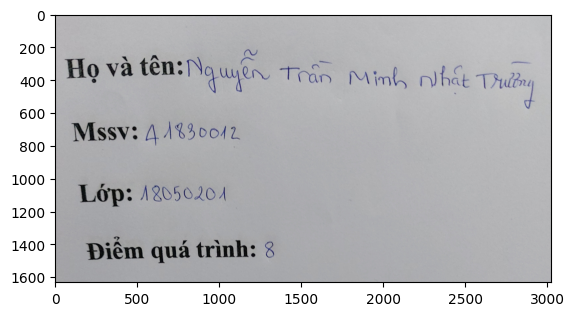

In [48]:
img = '/content/Test_img/20230415_163743.jpg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img, return_prob=True)
s

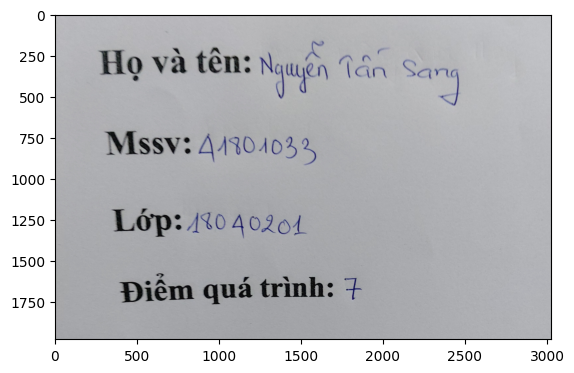

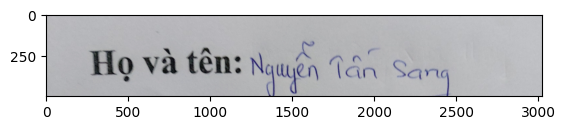

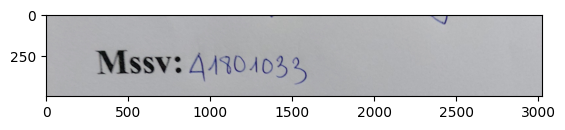

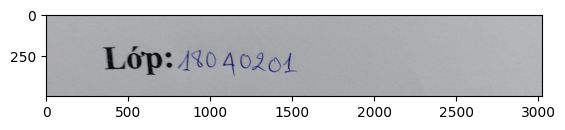

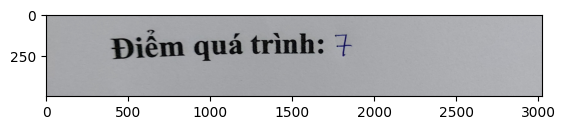

Full text:
Họ và tên: Nguyễn Tấn Sang
Mssv: 4/710.033
Lớp...50.40204
Điểm quá trình: 7

Full probability:
1: 0.8691902177838179
2: 0.8503013223409652
3: 0.6861659927027566
4: 0.9246768039815566



In [53]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image
img = Image.open('/content/Test_img/20230415_163750.jpg')

# Get image size
w, h = img.size

# Cut image into four equal parts from top to bottom
part1 = img.crop((0, 0, w, h//4))
part2 = img.crop((0, h//4, w, h//2))
part3 = img.crop((0, h//2, w, 3*h//4))
part4 = img.crop((0, 3*h//4, w, h))

# Show original image
plt.imshow(img)
plt.show()

# Show cropped images
texts = []
probs = []
for i, part in enumerate([part1, part2, part3, part4]):
    plt.imshow(part)
    plt.show()
    
    # Predict text
    text, prob = detector.predict(part, return_prob=True)
    
    # Append text and probability to lists
    texts.append(text)
    probs.append(prob)

# Concatenate text from each part
full_text = '\n'.join(texts)

# Concatenate probability from each part
full_prob = '\n'.join([f"{i+1}: {p}" for i, p in enumerate(probs)])

# Print full text and full probability
print(f"Full text:\n{full_text}\n")
print(f"Full probability:\n{full_prob}\n")